In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np
#from matplotlib import rcParams
#from scipy import stats

# Ingreso de datos

In [10]:
df = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/data/Data_Final.csv', sep=",",encoding="utf-8",low_memory=False,index_col=0)

# Dar formato de fecha
df['FECHA'] = pd.to_datetime(df['FECHA'], format = "%Y-%m" )
start_date = '2020-08-01'   
end_date = '2021-08-01'
mask = (df['FECHA'] > start_date) & (df['FECHA'] <= end_date)
df = df.loc[mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152696 entries, 11445 to 790446
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   NRO_SOLICITUD          152696 non-null  int64         
 1   OBLIGACION             152696 non-null  int64         
 2   PAGARE                 152696 non-null  object        
 3   NOM_TIPOCLIENTE        152696 non-null  object        
 4   REGION                 152696 non-null  object        
 5   MUNICIPIO_CLIENTE      152696 non-null  object        
 6   UBICACIO_CLIENTE       152696 non-null  object        
 7   MONTO                  152696 non-null  int64         
 8   FEC_SOLICITUD          152696 non-null  object        
 9   FEC_APROBA             152696 non-null  object        
 10  FEC_DESEMBOLSO         152696 non-null  object        
 11  VALOR_CUOTA            152696 non-null  float64       
 12  CUOTAS_PACTADAS        152696 non-null  

In [11]:
# Dataframe ultimo mes registrado
df_ultimo  =  df[df['FECHA'] == df['FECHA'].max()]

# Indicador 1: Total capital vencido en el ultimos mes registrado
cap_ven = df_ultimo['CAPITAL_VEN'].sum()

# Indicador 2: porcentaje de clientes que estan en mora en el ultimos mes registrado
por_mora = df_ultimo['DEUDOR'].sum()/df_ultimo['DEUDOR'].count()

# Indicador 3: Total por pagar en el ultimo mes registrado
total_saldo = df_ultimo['SALDO_OBLIGACION'].sum()


In [12]:
# Agrupar por fecha y variables de interes
df_tiempo = df.groupby(['FECHA','GENERO'], as_index=False).agg(CAPITAL_VENCIDO= ('CAPITAL_VEN','sum'),
                                     DEUDOR_SUMA = ('DEUDOR','sum'),
                                     DEUDOR_COUNT= ('DEUDOR','count'),
                                     SALDO_TOTAL= ('SALDO_OBLIGACION','sum'))

#Poner clientes en mora en porcentajes
df_tiempo['CLIENTES_MORA'] = df_tiempo['DEUDOR_SUMA']/df_tiempo['DEUDOR_COUNT']
df_tiempo.head()

,FECHA,GENERO,CAPITAL_VENCIDO,DEUDOR_SUMA,DEUDOR_COUNT,SALDO_TOTAL,CLIENTES_MORA
0,2020-09-01,Femenino,1123956761,2062,7048,19545245419,0.292565
1,2020-09-01,Masculino,1237315747,1743,5845,19148591870,0.298204
2,2020-10-01,Femenino,1116401870,1962,7118,19843402650,0.275639
3,2020-10-01,Masculino,1251485637,1651,5929,19532804716,0.278462
4,2020-11-01,Femenino,1183602085,2036,7075,20005715608,0.287774


<AxesSubplot:xlabel='FECHA', ylabel='CAPITAL_VENCIDO'>

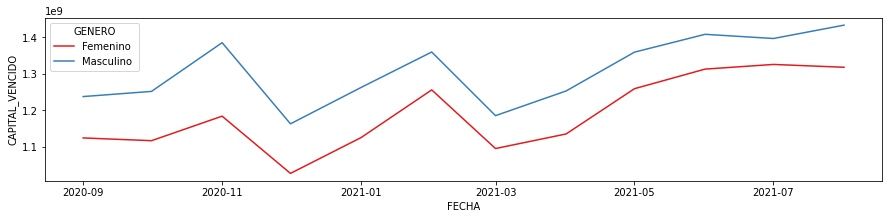

In [13]:
#Plot capital vencido
plt.figure(figsize=(15, 3))
sns.lineplot(x='FECHA',y='CAPITAL_VENCIDO',data=df_tiempo,palette='Set1', ci = None, legend='brief', hue='GENERO')

<AxesSubplot:xlabel='FECHA', ylabel='SALDO_TOTAL'>

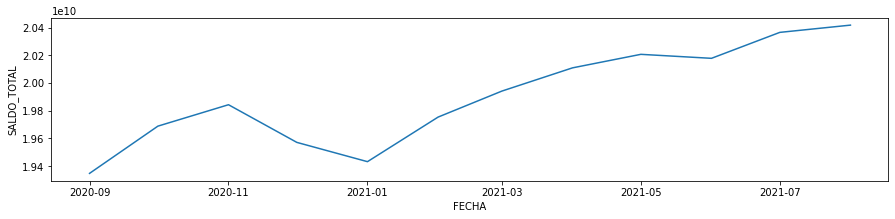

In [14]:
#Plot capital vencido
plt.figure(figsize=(15, 3))
sns.lineplot(x='FECHA',y='SALDO_TOTAL',data=df_tiempo,palette='Set1', ci = None, legend='brief')

<AxesSubplot:xlabel='FECHA', ylabel='CLIENTES_MORA'>

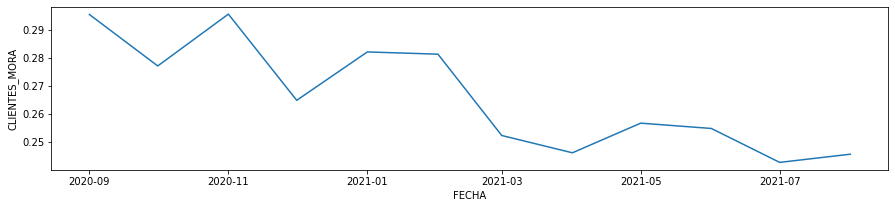

In [15]:
#Plot capital vencido
plt.figure(figsize=(15, 3))
sns.lineplot(x='FECHA',y='CLIENTES_MORA',data=df_tiempo,palette='Set1', ci = None, legend='brief')

In [16]:
df['FECHA']

11445    2020-09-01
11446    2020-10-01
11447    2020-11-01
11448    2020-12-01
42615    2020-09-01
            ...    
790442   2021-08-01
790443   2021-08-01
790444   2021-08-01
790445   2021-08-01
790446   2021-08-01
Name: FECHA, Length: 152696, dtype: datetime64[ns]

## transformando los csv en gzip

### primero data_final.csv

In [50]:
result_save = df.to_csv('Data_Final' + '.gzip', \
                                           index=True, \
                                           compression='gzip')

In [48]:
result_save1 = df.to_csv('Data_Final.csv',index=True)

In [51]:
reload1 = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/notebooks/Data_Final.gzip',
 sep=",", encoding="utf-8", low_memory=False, index_col=0, compression='gzip')

In [52]:
reload2 = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/notebooks/Data_Final.csv',
 sep=",", encoding="utf-8", low_memory=False, index_col=0)

In [53]:
print(reload1.shape)
print(reload2.shape)
print(df.shape)

(152696, 48)
(152696, 48)
(152696, 48)


### transformando data_modelo.csv

In [20]:
df_modelo = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/data/Data_modelo.csv', sep=",",encoding="utf-8",low_memory=False,index_col=0)

In [22]:
result_save1 = df_modelo.to_csv('Data_modelo' + '.gzip', \
                                           index=True, \
                                           compression='gzip')

In [23]:
reload2 = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/notebooks/Data_modelo.gzip',
 sep=",", encoding="utf-8", low_memory=False, index_col=0, compression='gzip')

In [25]:
print(reload2.shape)
print(df_modelo.shape)

(605985, 49)
(605985, 49)


In [26]:
reload2.head()

,NRO_SOLICITUD,OBLIGACION,PAGARE,NOM_TIPOCLIENTE,REGION,MUNICIPIO_CLIENTE,UBICACIO_CLIENTE,MONTO,FEC_SOLICITUD,FEC_APROBA,...,MORA_STATUS,SUCURSAL,ESTRATO,DESTINACION,TIPO_VIVIENDA,CODEUDOR_REF,DEUDOR,ACUMULADO,NIVEL_DE_ESTUDIOS_NEW,AÑO_APROBACION
182952,171000001,171000001,171000001,Microfinanciero,REGION CENTRO,YOPAL,URBANA,1000000,2017-01-17,2017-01-17,...,1.0,YOPAL,2.0,CAPITAL DE TRABAJO,Familiar,1,0,0,Media,2017
182953,171000001,171000001,171000001,Microfinanciero,REGION CENTRO,YOPAL,URBANA,1000000,2017-01-17,2017-01-17,...,1.0,YOPAL,2.0,CAPITAL DE TRABAJO,Familiar,1,0,0,Media,2017
182954,171000001,171000001,171000001,Microfinanciero,REGION CENTRO,YOPAL,URBANA,1000000,2017-01-17,2017-01-17,...,1.0,YOPAL,2.0,CAPITAL DE TRABAJO,Familiar,1,0,0,Media,2017
182955,171000001,171000001,171000001,Microfinanciero,REGION CENTRO,YOPAL,URBANA,1000000,2017-01-17,2017-01-17,...,1.0,YOPAL,2.0,CAPITAL DE TRABAJO,Familiar,1,1,0,Media,2017
182956,171000001,171000001,171000001,Microfinanciero,REGION CENTRO,YOPAL,URBANA,1000000,2017-01-17,2017-01-17,...,1.0,YOPAL,2.0,CAPITAL DE TRABAJO,Familiar,1,1,0,Media,2017


### Transformando municipios y departamentos

In [27]:
df_md = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/data/municipios_y_departamentos.csv', sep=",",encoding="utf-8",low_memory=False,index_col=0)

In [29]:
result_save3 = df_md.to_csv('Municipios_departamentos' + '.gzip', \
                                           index=True, \
                                           compression='gzip')

In [30]:
reload3 = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/notebooks/Municipios_departamentos.gzip',
 sep=",", encoding="utf-8", low_memory=False, index_col=0, compression='gzip')

In [31]:
print(reload3.shape)
print(df_md.shape)

(275, 4)
(275, 4)


### Transformando prueba_reglog

In [35]:
df_reglog = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/data/prueba_reglog.csv', sep=",",encoding="utf-8",low_memory=False,index_col=0)
df_reglog1 = df_reglog.sample(100).copy()

In [43]:
result_save4 = df_reglog1.to_csv('Prueba_reglog' + '.gzip', \
                                           index=True, \
                                           compression='gzip')

In [38]:
result_save5 = df_reglog1.to_csv('Prueba_reglog.csv',index=True)

In [46]:
reload4 = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/notebooks/Prueba_reglog.gzip',
 sep=",", encoding="utf-8", low_memory=False, index_col=0, compression='gzip')

reload5 = pd.read_csv('J:/Universidad/DS4A 6/frontend_fundacion_amanecer/notebooks/Prueba_reglog.csv',
 sep=",", encoding="utf-8", low_memory=False, index_col=0)

In [47]:
print(reload4.shape)
print(reload5.shape)
print(df_reglog1.shape)

(100, 31)
(100, 31)
(100, 31)
